# Code Breaking Part 4: Vigenere Cipher

The Vigenere Cipher uses several Caesar Shift Ciphers and a keyword to encrypt a message

This is a polyalphabetic substitution cipher

Note:
- The Gronsfield cipher is a variant of the Vigenere cipher where the keyword is a sequence of numbers instead of letters

In [1]:
from Resources.Functions import *

## Step 1) Encrypt the message

Say the plain text message is 
>HELLOWORLD

and the keyword is
>CIPHER

First we repeat the keyword such that each letter in the plain text message corresponds to a letter in the keyword


Repeated Keyword| C | I | P | H | E | R | C | I |P | H |
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
Plain Text | H | E | L | L | O | W | O | R | L | D |

We then encrypt each letter in the plain text according to the corresponding letter in the repeated keyword. 
Each letter gets encrypted via a Caesar shift that places the corresponding letter of the repeated keyword at the beginning of the cipher alphabat

#### For example:

The plain text letter **H** corresponds with the keyword letter **C**
- A Caesar shift of 2 to the left places **C** at the beginning of the cipher alphabet and gives us:

Number | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10| 11| 12 |13 |14 |15 |16| 17|18 |19 |20 |21 |22 |23 |24| 25|
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | ---| ---| --- |--- |--- |--- |---| ---|--- |--- |--- |--- |--- |--- |---| ---|
Plain Alphabet| a |b | c |d | e | f | g | **h** | i | j | k | l | m |n |o |p |q |r |s |t |u |v |w |x |y |z | 
Cipher Alphabet| C | D | E |F | G | H | I | **J** | K | L | M | N | O |P |Q |R |S |T |U |V |W |X |Y |Z |A |B |

- Therefore for the encryption of the first letter in the plain text, the plain text letter **H** gets mapped to the cipher text letter **J** 

This is repeated for each letter in the plain text alphabet, and we get the cipher text:

Repeated Keyword| C | I | P | H | E | R | C | I |P | H |
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
Plain Text | H | E | L | L | O | W | O | R | L | D |
Cipher Text| J | M | A | S | S | N | Q | Z |A | K |


Notes:
- We can see that **O** in "World" also corresponds with the keyword letter **C**, so the *O* in "World" will be encrypted using the exact same cipher alphabet as the *H* in "Hello"
- The same letters in the plain text may not be encrypted in the same way.  For example the **L**s in "Hello" will be encrypted differently since they correspond to different keyword letters


In [5]:
def Incrypt_VigenereCipher( plainText, keyword, plainAlphabet=englishAlphabet ):
    
    # -------- Repeat / wrap the keyword along the length of the text
    repeatedKeyword = []
    for i in range(int(len(plainText) / len(keyword)) ):
        for j in range(len(keyword)):
            repeatedKeyword.append(keyword[j])  
    for i in range(len(plainText) % len(keyword)):
        repeatedKeyword.append(keyword[i])
    # -------- Repeat / wrap the keyword along the length of the text.

    # -------- Create a dictionary of the ordered plain alphabet 
    # This is needed in order to determine what shift to use
    order = {}
    for i, letter in enumerate(plainAlphabet):
        order[letter.upper()] = i
    # -------- Create a dictionary of the ordered plain alphabet.

    # -------- Incrypt the message
    cipherText = ''
    for i in range(len(plainText)):
        shift = order[repeatedKeyword[i]]
        cipherText += Incrypt_CaesarShiftCipher(plainText[i], plainAlphabet, -shift)
    # -------- Incrypt the message.

    return cipherText
    

In [13]:
order = {}
for i, letter in enumerate(englishAlphabet):
    order[letter.upper()] = i
    
print(order['U'])

''.join( [str(i)+' ' for  i in list(np.roll(englishAlphabet,-20))])

20


'u v w x y z a b c d e f g h i j k l m n o p q r s t '

In [9]:
Incrypt_VigenereCipher( 'THECATNIPSTORESARESECURE', 'MOUSE' )

'FVYUEFBCHWFCLWWMFYKIOILW'

In [ ]:
FVY UEFBCH WFCLWW MFY KIOILW

## Step 2) De-encrypt the cipher text

Here we will assume that we know the key and encryption method.
We essentially repeat the steps of encrypting the text but in reverse

In [40]:
def Decrypt_VigenereCipher( cipherText, keyword, plainAlphabet ):
    
    # -------- Repeat / wrap the keyword along the length of the text
    repeatedKeyword = []
    for i in range(int(len(cipherText) / len(keyword)) ):
        for j in range(len(keyword)):
            repeatedKeyword.append(keyword[j])  
    for i in range(len(cipherText) % len(keyword)):
        repeatedKeyword.append(keyword[i])
    # -------- Repeat / wrap the keyword along the length of the text.

    # -------- Create a dictionary of the ordered plain alphabet 
    # This is needed in order to determine what shift to use
    order = {}
    for i, letter in enumerate(plainAlphabet):
        order[letter.upper()] = i
    # -------- Create a dictionary of the ordered plain alphabet.

    # -------- Incrypt the message
    plainText = ''
    for i in range(len(cipherText)):
        shift = order[repeatedKeyword[i]]
        plainText += Decrypt_CeaserShiftCipher(cipherText[i], plainAlphabet, -shift)
    # -------- Incrypt the message.

    return plainText

In [3]:
Decrypt_VigenereCipher( 'JMASSNQZAK', 'CIPHER')

'HELLOWORLD'

## Step 3)  Let's try to break the encryption 

1. First, we need to find the length of the keyword (this is called the *period* of the cipher).  To do this we use a **Periodic Incidence of Coincidence** calculation
2. Second, we need to determine the keyword used to encrypt the message. To do this we use **Chi-squared statistics**

As with many cryptanalysis methods, this approach works best on a long message

### Step 3.1) Periodic Incidence of Coincidence
Number| 0| 1 | 2 | 3 | 4 | 5 | 6 | 7 |8 | 9 |
---| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
Plain Text | J | M | A | S |S | N | Q | Z |A | K |

1. Assume the length of the keyword is 2 (this is the minimum length  of keyword for Vigenere, a length of 1 is just a regular Caesar shift). 
2. Extract every second letter. ie extract two lists, one will have the $1,3,5,7,..$ letters and the other will have the $0,2,4,6,...$ letters 

Number| 0|  2 |  4 | 6 | 8 |
---| --- | --- | --- | --- | --- |
Plain Text | J | A | S | Q |A | K | A |

Number| 1|  3 |  5 | 7 | 9 |
---| --- | --- | --- | --- | --- |
Plain Text | M | S | N |Z | K |

3. Find the incidence of coincidence of each of the sequences and average them.  This is the IOC of period 2

4. Repeat steps 1-3 for a period of 3, then a period of 4, and so on 


In [48]:
cipherText = 'vptnvffuntshtarptymjwzirappljmhhqvsubwlzzygvtyitarptyiougxiuydtgzhhvvmumshwkzgstfmekvmpkswdgbilvjljmglmjfqwioiivknulvvfemioiemojtywdsajtwmtcgluysdsumfbieugmvalvxkjduetukatymvkqzhvqvgvptytjwwldyeevquhlulwpkt'

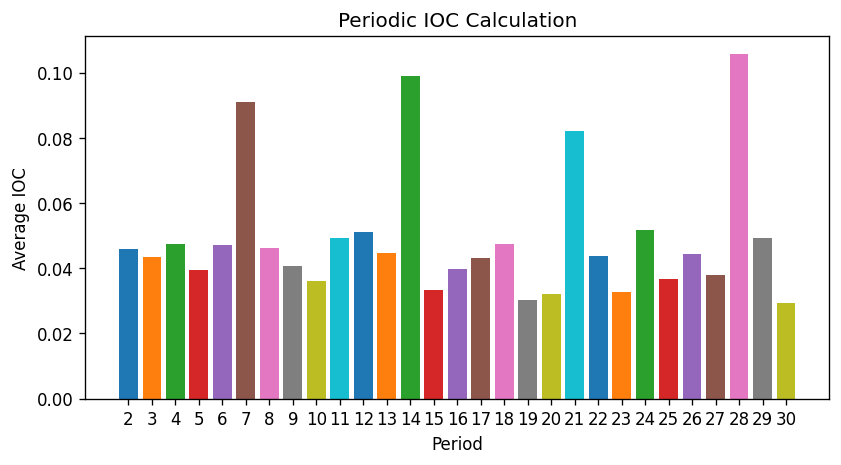

In [50]:
longestLength =  30 # Longest assumed keyword length should not be longer than the length of the cipher text

PeriodicIOC = {}
for period in range(2, longestLength+1):
    IoC = []
    for startPosition in range(period):
        # Extact a sequence of letters from the cipher text
        subText = [ cipherText[i] for i in range(startPosition,len(cipherText),period)]
        IoC.append(IncidenceOfCoincidence(subText))
    PeriodicIOC[period] = np.mean(IoC)
    

plt.figure(figsize=(8,4),dpi=120) 
for i,key in enumerate(PeriodicIOC):
    bar = plt.bar(i,PeriodicIOC[key])
xticks = plt.xticks(np.arange(len(PeriodicIOC.keys())),PeriodicIOC.keys())
ylabel = plt.ylabel('Average IOC')
xlabel = plt.xlabel('Period')
title = plt.title('Periodic IOC Calculation')

We see significant peaks at $7,14,21,28$ 
- The keyword length is probably $7$ (the lowest peak)

We can try a keyword length of $7$, but if that yeilds no results we can also try a keyword length of $14,21,28$

### 3.2) Determine the keyword; Chi-Squared Statistics



If we now assume that the keyword length is $7$
1. Divide the cipher text into seven sequences. ie take the letters in positions $0,7,14,..$ and $1,8,15,..$ and $2,9,16,..$. Each of these sequences will have been encrypted using the same Caesar cipher

2. Decrypt each of these sequences by trying all 26 Caesar shifts.   For each trial decryptment, calculate the Chi-squared value of the text to see how close to English it is.  The lowest Chi-squared value is likely to be the correct encryption 

$$ \chi^{2} (C, E) = \sum^{i=Z}_{i = A} \frac{(C_i - E_i)^2}{E_i} $$
- $C_i$ is the actual count
- $E_i$ is the expected count

In [92]:
def ChiSquaredStatistic(sampleText, knownLetterFrequencies):
    '''Compute the Chi-Squared Statistic for a sample text. 
    
    - A text that has letter frequencies more similar to the known 
    letter frequencies will get a lower score
    
    -Please remove all non-text characters  before calculatin the Chi-Squared Statistic
    '''
    textLength = len(sampleText)
    sampleLetterFrequencies = letterFrequencies(sampleText)
    
    ChiSquared = 0
    for letter in sampleLetterFrequencies.keys():
        expectedCount = knownLetterFrequencies[letter] * textLength
        actualCount = sampleLetterFrequencies[letter] * textLength
        
        ChiSquared += (actualCount - expectedCount)**2 / expectedCount
    return ChiSquared

In [93]:
ChiSquaredStatistic('aoljhlzhyjpwolypzvulvmaollhysplzaruvduhukzptwslzajpwolyzpapzhafwlvmzbizapabapvujpwolypudopjolhjoslaalypuaolwshpualeapzzopmalkhjlyahpuubtilyvmwshjlzkvduaolhswohila', letterFrequencies_English)

1612.0368793774037

In [125]:
def Break_VigenereChiSquared( cipherText, period, plainAlphabet, knownLetterFrequencies ):
    '''Decrypt a Vigenere Cipher using Chi Squared Statistics
    - Period is the likely keyword length as determined via Periodic IOC
    '''

    possibleShifts = [i for i in range(0, len(plainAlphabet))]

    order = {}
    for i, letter in enumerate(plainAlphabet):
        order[i] = letter.upper()

    keyword = ''
    for startPosition in range(period):

        # Extact a sequence of letters from the cipher text
        subText = [ cipherText[i] for i in range(startPosition,len(cipherText),period)]

        lowestScore = 1e9 # A very high number
        incryptedShift = 0
        for shift in possibleShifts:
            # Test a possible decryption
            decryptedText_test = Decrypt_CeaserShiftCipher(subText, plainAlphabet, -shift)
            # Get Chi-Squared Score
            score = ChiSquaredStatistic(decryptedText_test, knownLetterFrequencies)
            # Update Solution
            if score < lowestScore:
                lowestScore = score
                incryptedShift = shift

        keyword += order[incryptedShift]
        
    return keyword, Decrypt_VigenereCipher(cipherText, keyword, plainAlphabet )

In [5]:
cipherText = "vptnvffuntshtarptymjwzirappljmhhqvsubwlzzygvtyitarptyiougxiuydtgzhhvvmumshwkzgstfmekvmpkswdgbilvjljmglmjfqwioiivknulvvfemioiemojtywdsajtwmtcgluysdsumfbieugmvalvxkjduetukatymvkqzhvqvgvptytjwwldyeevquhlulwpkt"

In [6]:
Break_VigenereChiSquared(prepareText(cipherText), 7)

('CIAHERS',
 'THTGRONSFTLDCIPHTRISEXARTLYTHEHAMEASTWEVIGENTRECIPHTREXCEPINUMBERHAREUSESASTHEKTYINSTEPDOFLETIERSTHEGEISNOOIHERDIFUERENCEIHENUMBTRSMAYBTPICKEDUROMASEFUENCEEVTHEFIBDNACCISTRIESORHOMEOTHTRPSEUDDRANDOMHEQUENCT')

Here we did not get the correct keyword.  This is probably because the ciper text was too short. 

If we think that the keyword is likely a real word, then we can try different spellings or variations of the proposed keyword returned via the Chi-Squared Statistics test

In [126]:
Decrypt_VigenereCipher(cipherText, 'CIPHERS', plainAlphabet )

'thegronsfeldcipherisexactlythesameasthevigenerecipherexceptnumbersareusedasthekeyinsteadoflettersthereisnootherdifferencethenumbersmaybepickedfromasequenceegthefibonacciseriesorsomeotherpseudorandomsequence'

### 3.2) Determine the keyword; Trial And Error  / Dictionary Attack

If we are fairly confident that the keyword is a certain length, we can just try words of that length

For example, if we believe the keyword to have length $7$ could either try to guess specific words or try all English words with length $7$ 

- This approach does not work well if the keyword is not a common word (or is not a word at all), or has atypical spelling, or is in a language that we do not know.
- This approach may take a very long time if there are many words to try 

Here is a short block of code to write a dictionary file with no punctuation 
```Python 
dictionary=open('Resources/SampleTexts/englishWords.txt')
dictNew = open('Resources/SampleTexts/englishWords3.txt', "w")


for word in dictionary.readlines():
    word = ''.join([char for char in word if char.isalpha()])
    dictNew.write("{}\n".format(word))

```


In [48]:
def break_VigenereDictionarySearch(cipherText, period, plainAlphabet=englishAlphabet, dictionary=open('Resources/SampleTexts/commonEnglishWords.txt').readlines(), knownLetterFrequencies=letterFrequencies_English):

    SelectWords = []
    for word in dictionary:
        word = word.strip()
        if len(word) == period:
            SelectWords.append(word)

    bestKey = []
    bestScore = 99e9
    for key in SelectWords:
        key = key.upper()
        decrypted = Decrypt_VigenereCipher(cipherText, key, plainAlphabet )
        score = ChiSquaredStatistic(decrypted, knownLetterFrequencies)
    if score < bestScore:
            bestKey = key
            bestScore = score
            
    return bestKey, Decrypt_VigenereCipher(cipherText,bestKey,plainAlphabet)
  

In [49]:
 break_VigenereDictionarySearch(cipherText, 7, dictionary=open('Resources/SampleTexts/englishWords3.txt').readlines())

KeyboardInterrupt: 